# Visualização de Dados

1. Matplotlib, Seaborn e Ploty

SITUAÇÃO PROBLEMA

Vamos supor que você seja dono de um banco em Taiwan que oferta serviço de crédito. Você tem em mãos uma tabela em excel com dados dos clientes que contrataram o serviço de crédito.

    Objetivo: apresentar um panorama consolidado sobre a situação dos clientes no banco para o restante da empresa.

    Objetivo específico: analisar a situação dos clientes (valor de crédito concedido, valor pago e extrato), nos últimos meses para o ano de 2005 de acordo com o nível de escolaridade.

In [88]:
#     Instalando Bibliotecas
"""
    CASO O PANDAS OU OUTRA BIBLIOTECA UTILIZADA NÂO ESTEJAM INSTALADOS EXECUTE:
      #instalar Pandas 
        !pip install pandas
        !pip install matplotlib
        !pip install seaborn
        !pip install plotly
"""
#     Importando Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [63]:
#     Importando DataSet
credit = pd.read_excel(r'Arquivos da Aplicação\credit_data.xlsx')
credit

,Unnamed: 0,ID,valor_credito,sexo,escolaridade,estado_civil,idade,status_pag_set_2005,status_pag_ago_2005,status_pag_jul_2005,...,extrato_jul_2005,extrato_jun_2005,extrato_mai_2005,extrato_abr_2005,valor_pag_set_2005,valor_pag_ago_2005,valor_pag_jul_2005,valor_pag_jun_2005,valor_pag_mai_2005,valor_pag_abr_2005
0,0,1,20000,2,2,1,24,2,2,-1,...,689,0,0,0,0,689,0,0,0,0
1,1,2,120000,2,2,2,26,-1,2,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,2,3,90000,2,2,2,34,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,3,4,50000,2,2,1,37,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,4,5,50000,1,2,1,57,-1,0,-1,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29995,29996,220000,1,3,1,39,0,0,0,...,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29996,29996,29997,150000,1,3,2,43,-1,-1,-1,...,3502,8979,5190,0,1837,3526,8998,129,0,0
29997,29997,29998,30000,1,2,2,37,4,3,2,...,2758,20878,20582,19357,0,0,22000,4200,2000,3100
29998,29998,29999,80000,1,3,1,41,1,-1,0,...,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804


In [83]:
'''     Excluindo dados com escolaridade = 0, pois eles não fazem sentido no DataFrame, tendo em vista
    que os valores da escolaridade são de 1 até 6.
   
   Níveis de escolaridade:
    1 = pós-graduação
    2 = universidade
    3 = ensino médio
    4 = outros
    5 = desconhecido
    6 = desconhecido'''
drop_dados = credit[credit.escolaridade == 0].index
credit.drop(drop_dados, inplace = True)

In [84]:
#     Agrupando Dados
credit_grouped = credit.groupby(['escolaridade']).mean().reset_index()

credit_grouped

,escolaridade,Unnamed: 0,ID,valor_credito,sexo,estado_civil,idade,status_pag_set_2005,status_pag_ago_2005,status_pag_jul_2005,...,extrato_jul_2005,extrato_jun_2005,extrato_mai_2005,extrato_abr_2005,valor_pag_set_2005,valor_pag_ago_2005,valor_pag_jul_2005,valor_pag_jun_2005,valor_pag_mai_2005,valor_pag_abr_2005
0,1,14696.212187,14697.212187,212956.069910,1.588663,1.652338,34.231838,-0.233916,-0.408125,-0.425886,...,45781.689183,42931.065187,40388.891261,38668.076051,6780.933585,7306.622201,6560.585735,5804.565612,5776.562211,6422.554842
1,2,15023.237776,15024.237776,147062.437634,1.616964,1.523022,34.722096,0.102210,0.022523,-0.018532,...,48662.161582,44748.779758,41588.566287,40431.943835,5080.463293,5106.711333,4556.800000,4375.387313,4452.678689,4716.487028
2,3,15341.314013,15342.314013,126550.270490,1.595282,1.421192,40.299980,0.132805,0.040879,0.002644,...,43440.916616,38718.582266,35957.469392,34704.597315,4866.397397,5053.454139,3964.056742,3992.658532,3599.658938,3825.749034
3,4,18142.447154,18143.447154,220894.308943,1.658537,1.601626,33.853659,-0.504065,-0.772358,-0.764228,...,44983.804878,39570.268293,33840.113821,32136.130081,5450.512195,6555.008130,9990.626016,5104.861789,5991.642276,4284.967480
4,5,17442.664286,17443.664286,168164.285714,1.660714,1.475000,35.600000,-0.121429,-0.303571,-0.375000,...,71743.357143,62275.767857,53568.014286,46083.860714,5970.714286,8912.921429,7718.510714,4927.332143,4633.246429,7772.114286
5,6,16894.019608,16895.019608,148235.294118,1.509804,1.490196,43.901961,-0.176471,-0.313725,-0.372549,...,70586.313725,54259.490196,44510.745098,39578.509804,9780.450980,6176.431373,7644.941176,5179.490196,11691.137255,14773.901961


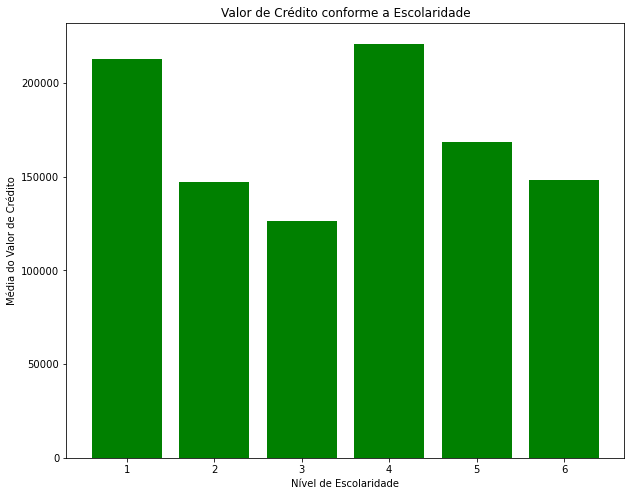

In [126]:
#     Gráfico de barras com Matplotlib
    #    Média de crédito concedida conforme a escolaridade
plt.figure(figsize = (10,8), facecolor= "w") # Configurando tamanho do gráfico
plt.title("Valor de Crédito conforme a Escolaridade") # Configurando título do Gráfico
plt.xlabel("Nível de Escolaridade") # Configurando título do eixo x
plt.ylabel("Média do Valor de Crédito") # Configurando título do eixo y
#Configurando valores dos eixos
plt.bar(credit_grouped.escolaridade, credit_grouped.valor_credito, color = 'Green');

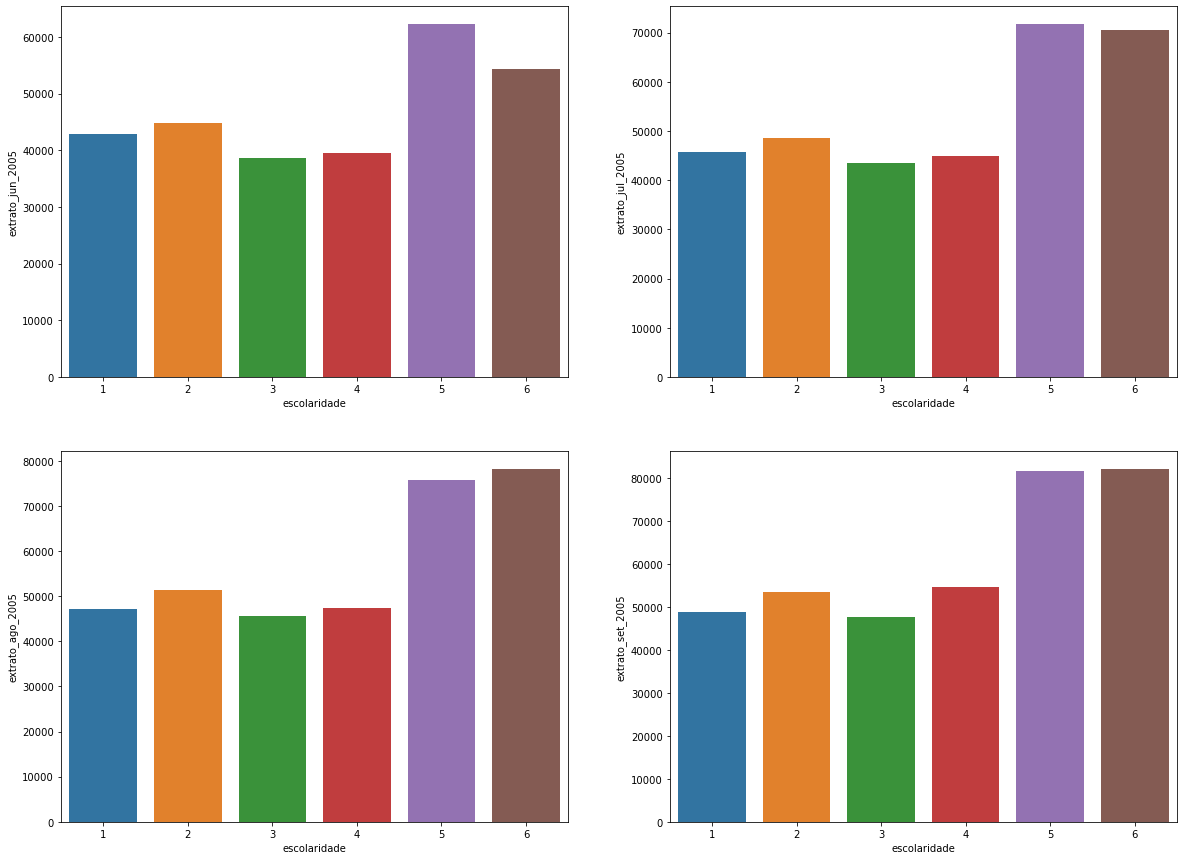

In [129]:
#     Gráficos de barras multiplos com Seaborn
    #     Verificando extrato bancário de acordo com o nível de escolaridade para cada mês
fig, axes = plt.subplots(2, 2, figsize = (20, 15), facecolor = "w")
sns.barplot(data = credit_grouped, x = "escolaridade", y = "extrato_jun_2005", ax = axes[0, 0])
sns.barplot(data = credit_grouped, x = "escolaridade", y = "extrato_jul_2005", ax = axes[0, 1])
sns.barplot(data = credit_grouped, x = "escolaridade", y = "extrato_ago_2005", ax = axes[1, 0])
sns.barplot(data = credit_grouped, x = "escolaridade", y = "extrato_set_2005", ax = axes[1, 1]);

In [157]:
#     Gráfico de barras com Ploty
    #     Valor pago nos últimos conforme escolaridade
fig = go.Figure()

fig.add_trace(go.Bar(x = credit_grouped.escolaridade, 
                     y= credit_grouped.valor_pag_abr_2005,
                    marker_color = "Red",
                    name = "Valor Pago em Abril"))
fig.add_trace(go.Bar(x = credit_grouped.escolaridade, 
                     y= credit_grouped.valor_pag_jun_2005,
                    marker_color = "Green",
                    name = "Valor Pago em Junho"))
fig.add_trace(go.Bar(x = credit_grouped.escolaridade, 
                     y= credit_grouped.valor_pag_jul_2005,
                    marker_color = "Blue",
                    name = "Valor Pago em Julho"))
fig.add_trace(go.Bar(x = credit_grouped.escolaridade, 
                     y= credit_grouped.valor_pag_ago_2005,
                    marker_color = "Yellow",
                    name = "Valor Pago em Agosto"))
fig.add_trace(go.Bar(x = credit_grouped.escolaridade, 
                     y= credit_grouped.valor_pag_set_2005,
                    marker_color = "Purple",
                    name = "Valor Pago em Setembro"))
fig.update_layout(title= "Valor Pago em Cada Mês Conforme a Escolaridade",
                  xaxis=dict(title = "Nível de Escolaridade", titlefont_size = 14, tickfont_size = 12),
                  yaxis=dict(title = "Valor Pago", titlefont_size = 14, tickfont_size = 12))
#     Salvando Gráfico Interativo em html
fig.write_html("Arquivos da Aplicação/Valor pago por escolaridade.html")
#     Mostrando gráfico no output
fig.show()